# Importando e tratando os dados

In [1]:
!pip install numpy pandas seaborn matplotlib statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('dados_ibovespa.csv', sep=',', thousands='.', parse_dates=[0], date_format='%d.%m.%Y')
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-07-22,127860,127616,128151,127456,"6,10B","0,19%"
1,2024-07-19,127616,127652,128360,127413,"7,62B","-0,03%"
2,2024-07-18,127652,129450,129454,127523,"7,59B","-1,39%"
3,2024-07-17,129450,129112,129658,128741,"6,67B","0,26%"
4,2024-07-16,129110,129322,129521,128761,"6,82B","-0,16%"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      4953 non-null   datetime64[ns]
 1   Último    4953 non-null   int64         
 2   Abertura  4953 non-null   int64         
 3   Máxima    4953 non-null   int64         
 4   Mínima    4953 non-null   int64         
 5   Vol.      4952 non-null   object        
 6   Var%      4953 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 271.0+ KB


In [15]:
# Lista de nomes das colunas desejados
nomes_colunas = ['data', 'fechamento','abertura', 'maxima', 'minima', 'volume', 'variacao']

# Renomeando as colunas
df.columns = nomes_colunas
df.head()

,data,fechamento,abertura,maxima,minima,volume,variacao
0,2024-07-22,127860,127616,128151,127456,"6,10B","0,19%"
1,2024-07-19,127616,127652,128360,127413,"7,62B","-0,03%"
2,2024-07-18,127652,129450,129454,127523,"7,59B","-1,39%"
3,2024-07-17,129450,129112,129658,128741,"6,67B","0,26%"
4,2024-07-16,129110,129322,129521,128761,"6,82B","-0,16%"


In [16]:
# Tratando volume - removendo letras e substituir vírgula por ponto
df['volume'] = df['volume'].str.replace('B', 'e9').str.replace('M', 'e6').str.replace('K','e3').str.replace(',', '.')

# Convertendo para numérico
df['volume'] = pd.to_numeric(df['volume'])

df.head()

,data,fechamento,abertura,maxima,minima,volume,variacao
0,2024-07-22,127860,127616,128151,127456,6.100000e+09,"0,19%"
1,2024-07-19,127616,127652,128360,127413,7.620000e+09,"-0,03%"
2,2024-07-18,127652,129450,129454,127523,7.590000e+09,"-1,39%"
3,2024-07-17,129450,129112,129658,128741,6.670000e+09,"0,26%"
4,2024-07-16,129110,129322,129521,128761,6.820000e+09,"-0,16%"


In [17]:
# Tratando variação - Removendo o símbolo de porcentagem e converter para float
df['variacao'] = df['variacao'].str.replace('%', '').str.replace(',', '.').astype(float)

df.head()

,data,fechamento,abertura,maxima,minima,volume,variacao
0,2024-07-22,127860,127616,128151,127456,6.100000e+09,0.19
1,2024-07-19,127616,127652,128360,127413,7.620000e+09,-0.03
2,2024-07-18,127652,129450,129454,127523,7.590000e+09,-1.39
3,2024-07-17,129450,129112,129658,128741,6.670000e+09,0.26
4,2024-07-16,129110,129322,129521,128761,6.820000e+09,-0.16


In [18]:
# Ordenando os dados pela data em ordem crescrente
df = df.sort_values('data').reset_index(drop=True)
df.head()

,data,fechamento,abertura,maxima,minima,volume,variacao
0,2004-07-22,21730,21821,21938,21490,247830000.0,-0.37
1,2004-07-23,21591,21729,22100,21559,318000000.0,-0.64
2,2004-07-26,21318,21635,21930,21056,227130000.0,-1.26
3,2004-07-27,21737,21325,21813,21236,282560000.0,1.97
4,2004-07-28,22168,21740,22213,21613,285650000.0,1.98


In [19]:
df.tail()

,data,fechamento,abertura,maxima,minima,volume,variacao
4948,2024-07-16,129110,129322,129521,128761,6.820000e+09,-0.16
4949,2024-07-17,129450,129112,129658,128741,6.670000e+09,0.26
4950,2024-07-18,127652,129450,129454,127523,7.590000e+09,-1.39
4951,2024-07-19,127616,127652,128360,127413,7.620000e+09,-0.03
4952,2024-07-22,127860,127616,128151,127456,6.100000e+09,0.19


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        4953 non-null   datetime64[ns]
 1   fechamento  4953 non-null   int64         
 2   abertura    4953 non-null   int64         
 3   maxima      4953 non-null   int64         
 4   minima      4953 non-null   int64         
 5   volume      4952 non-null   float64       
 6   variacao    4953 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 271.0 KB


In [21]:
# convertendo data em índice
df = df.set_index('data')

df.head()

,fechamento,abertura,maxima,minima,volume,variacao
data,,,,,,
2004-07-22,21730,21821,21938,21490,247830000.0,-0.37
2004-07-23,21591,21729,22100,21559,318000000.0,-0.64
2004-07-26,21318,21635,21930,21056,227130000.0,-1.26
2004-07-27,21737,21325,21813,21236,282560000.0,1.97
2004-07-28,22168,21740,22213,21613,285650000.0,1.98


# Análise Exploratória dos Dados

## Passo 1: Visualização dos dados

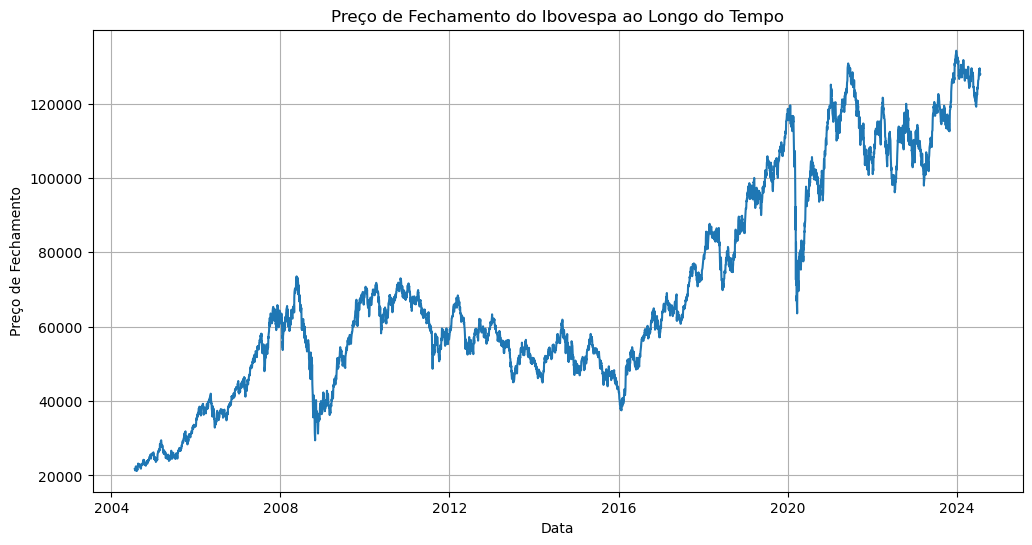

In [22]:
# Gráfico de linha do preço de fechamento ao longo do tempo

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['fechamento'], linestyle='-')
plt.title('Preço de Fechamento do Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()